req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\adars\AppData\Local\Temp\fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.1.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loa

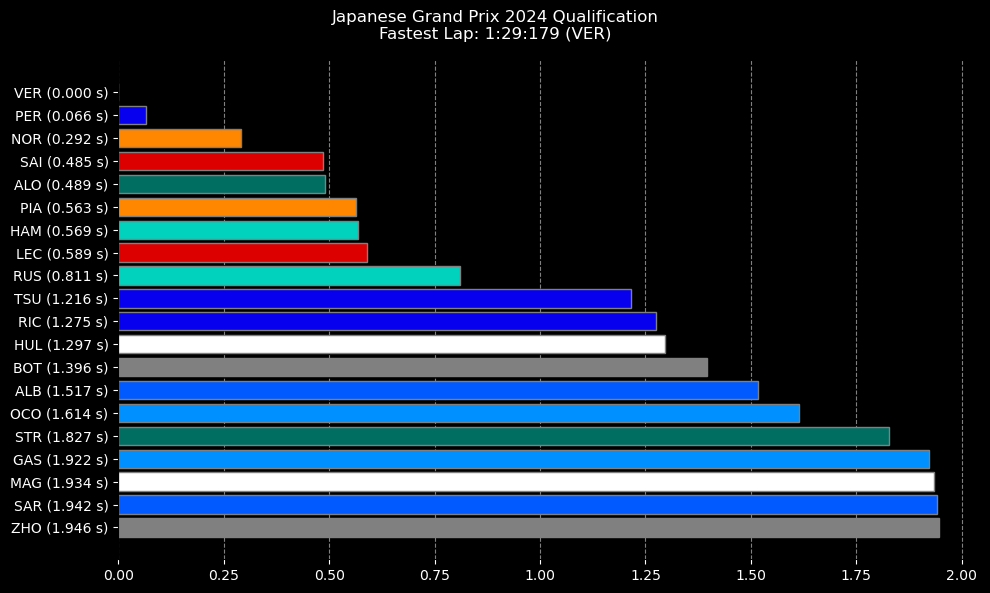

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import fastf1
import fastf1.plotting
from fastf1.core import Laps

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(2024, 'Japan', 'Q')
session.load()

drivers = pd.unique(session.laps['Driver'])

list_fastest_laps = []
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = []
for _, lap in fastest_laps.iterlaps():
    try:
        color = fastf1.plotting.team_color(lap['Team'])
    except KeyError:
        color = 'gray'
    team_colors.append(color)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'].dt.total_seconds(),
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels([f"{driver} ({delta.total_seconds():.3f} s)" for driver, delta in zip(fastest_laps['Driver'], fastest_laps['LapTimeDelta'])])

ax.invert_yaxis()

ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='grey', zorder=-1000)

fig.patch.set_facecolor('black')  
ax.set_facecolor('black')
ax.grid(axis='x', color='grey', linestyle='--')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

lap_time_seconds = pole_lap['LapTime'].total_seconds()
lap_time_string = f"{int(lap_time_seconds)}.{int((lap_time_seconds * 1000) % 1000):03d}"
plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualification\n"
             f"Fastest Lap: 1:29:179 ({pole_lap['Driver']})", color='white')

plt.tight_layout()
plt.show()
